# Exploratory Data Analysis on a Super Store Dataset

> Author: Diogo Silva
>
> Date: 18 March 2023

<a href="https://colab.research.google.com/github/diogo-costa-silva/eda-python-projects/blob/main/Super%20Store/super_store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices. The data set contains sales, profit and geographical information of individual orders. 

Our task is to determine weak areas and opportunities for Super Store to boost business growth.

**Business Questions**

1. Which Category is Best Selling and Most Profitable?
2. What are the Best Selling and Most Profitable Sub-Category?
3. Which is the Top Selling Sub-Category?
4. Which Customer Segment is Most Profitable?
5. Which is the Preferred Ship Mode?
6. Which Region is the Most Profitable?
7. Which City has the Highest Number of Sales?

## 0. Downloading and Loading the Dataset

In [2]:
%pip install opendatasets kaggle -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/akashkothare/tsf-datasets/data?select=SampleSuperstore.csv'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  dccsilva


Your Kaggle Key:

  ········


100%|██████████| 108M/108M [11:13<00:00, 167kB/s]  


In [1]:
# Import libraries and alias for easy reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
# Read in data in CSV format
superstore = pd.read_csv('./tsf-datasets/SampleSuperstore.csv')

---
## 1. Data Understanding

Let's do an initial check on the dataset.

In [9]:
# Shape of data set
superstore.shape

(9994, 13)

In [6]:
# Preview the first 5 rows of dataset
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
# Preview the last 5 rows of dataset
superstore.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
# List the column name in the dataset
superstore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

The dataset being analysed has 9994 rows (records) (including header) and 13 columns (variables).

After generally analysing the data, we can see that there is indeed a mixture of categorical, geographical and numerical variables. 

- **Categorical variables**: Ship Mode; Segment; Category; Sub-Category

- **Geographical Variables**: Country; City; State; Postal Code; Region

- **Numeric Variables**: Sales; Quantity; Discount; Profit

Each row represents an order for an item and its quantity, sales, discount and profit. There's also the shipping method, customer segment and geographical aspects.

In [10]:
# Summarised information of data set
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The info function gives us a set of information that is very relevant to analysing the dataset. Once again, we can see the number of rows and columns and the name of each one, that **there are no null values** in any of the columns and that the current variable types are in line with the nature of the data.

## 2. Data Cleaning (Pre-processing)

Before we start with the proper analysis, we must first clean the data or "scrub the dirt".

In this stage, we will look at the common situations such as missing and duplicate data.

### 2.1. Handling Missing Values

In [11]:
# Find the number of null values for all columns
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

As we've seen before with the info function and can see now, there are no null values in this dataset.

### 2.2. Duplicate Data

In [12]:
# Find the number of duplicate data
superstore.duplicated().sum()

17

Hence, there are 17 rows that are duplicates. Let's execute another function to inspect this duplicated data:

In [13]:
# Show the duplicated rows
superstore[superstore.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


Next, we will utilize the drop_duplicates() function to eliminate the duplicated rows.

In [15]:
# Drop the duplicated rows
superstore.drop_duplicates(inplace = True)

In [16]:
# Re-check the number of rows and columns
superstore.shape

(9977, 13)

We can see that the duplicate values are no longer in the dataframe.

### 2.3. Create "Profit Margin %" variable

Next, we will construct a calculated field named **Profit Margin %**. 

This is computed using the formula $$(Profit / Sales) * 100$$.

In [17]:
superstore['Profit Margin %'] = (superstore.Profit / superstore.Sales) * 100
superstore.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


I believe that for the moment these are the changes needed to make the data better prepared to be analysed. So let's move on to the Data Exploration phase, but if any further changes need to be made, they will be documented and justified in the following steps.

---

## 3. Descriptive Statistics

In this section, we will conduct a descriptive statistical analysis. We will employ df.describe() and set 'include = 'all'' to guarantee that both numerical and categorical features are incorporated in the results.

In [18]:
# Get descriptive statistics summary
superstore.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


You'll notice 'NaN' values in certain categorical columns, which is completely normal. Categorical values are not designed for numerical calculations, so these can be overlooked.

Our main interest lies in the unique count and frequency of categorical attributes such as:

- The presence of 4 shipping modes and 3 customer segments, with nearly half of the orders coming from the Consumer segment using Standard Class shipping.
- The store offers 3 categories of items across 17 sub-categories. Office Supplies constitute 60% of orders, with at least 15% of purchases being Binders.

Regarding numerical data, it's notable that:

- 75% of orders achieve at least a 36% profit margin.
- The losses on some orders can escalate up to 275%. It's crucial to focus on these loss-incurring sales to minimize them.

We will conduct some analysis below to further explore these findings.

---

## 4. Exploratory Data Analysis

### 4.1. Which Category is Best Selling and Most Profitable?

"Best Selling" refers to analyzing the Sales figures, while "Most Profitable" pertains to examining the Profit figures. We will aggregate Sales, Profit, and Quantity by Category and execute the df.group().sum and pd.DataFrame() functions to process the data.

In [19]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(superstore.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


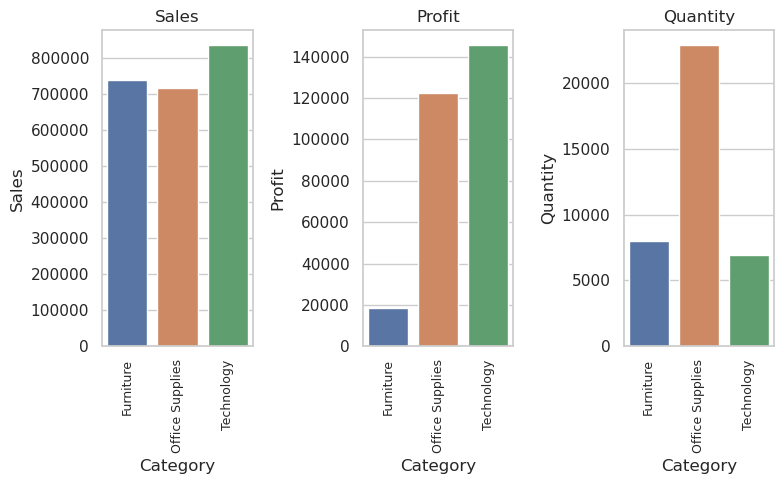

In [30]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# This sets the global palette to 'deep'
# Seaborn supports palette names like 'deep', 'muted', 'bright', 'pastel', 'dark', and 'colorblind'.
#sns.set_palette('deep')  

# Plot barplots with different color palettes
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0], palette='deep')
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1], palette='deep')
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2], palette='deep')

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

After analysing the graphs above, we came to the following conclusions:

- The three product categories — **Furniture**, **Office Supplies**, and **Technology** — exhibit comparable sales figures.
- The **Technology** category emerges as the **top seller** and notably, it also **leads in profitability**. This is likely due to the nature of technology products, which are typically high-value, one-time purchases expected to last for several years.
- Despite achieving sales comparable to those of Technology, **Furniture** is identified as the **least profitable** category, with lower quantities sold. This suggests that, despite high sales values, the cost or volume does not translate into high profitability.
- **Office Supplies**, on the other hand, show the **highest sales volume**. This can be attributed to the products being more affordable, leading to higher consumption rates.

### 4.2. What are the Best Selling and Most Profitable Sub-Category?

In [31]:
# Group by sub-category
subcat_analysis = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [32]:
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [33]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


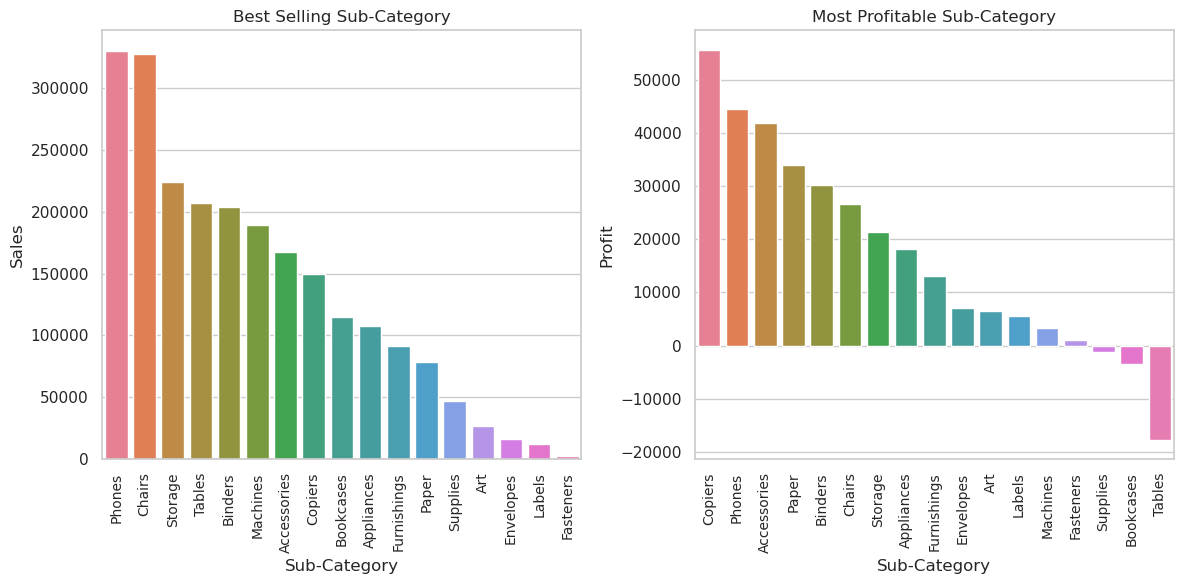

In [35]:
# Set theme
sns.set_theme(style="whitegrid")

# Prepare data for plotting
categories = subcat_sales.index
palette_sales = sns.color_palette("husl", len(categories))  # Create a palette with a distinct color for each category

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data=subcat_sales, x=subcat_sales.index, y=subcat_sales.Sales, ax=axis[0], palette=palette_sales)
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(), rotation="vertical", size=10)

# Prepare a different palette if the categories are different or use the same if they are the same
categories_profit = subcat_profit.index
palette_profit = sns.color_palette("husl", len(categories_profit))  # Adjust the palette accordingly

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data=subcat_profit, x=subcat_profit.index, y=subcat_profit.Profit, ax=axis[1], palette=palette_profit)
subcat2.set(title="Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(), rotation="vertical", size=10)

# Set spacing between subplots
figure.tight_layout()

# Show the plots
plt.show()


After analysing the graphs above, we came to the following conclusions:

- The sub-categories of **Phones** and **Chairs** are the leading two in terms of **sales**.
- **Copiers** are the **most profitable**, with **Phones**, **Accessories**, **Papers**, and **Binders** following in profitability. The marketing approach should be adjusted to prioritize these items.
- Conversely, **Machines**, **Fasteners**, **Supplies**, **Bookcases**, and **Tables** are generating negligible margins or are outright **loss-making**. These items should be **reassessed** by the Super Store for **potential discontinuation**, pricing adjustments, or cost negotiations with suppliers.

### 4.3. Which is the Top Selling Sub-Category?

In [36]:
subcat_quantity = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


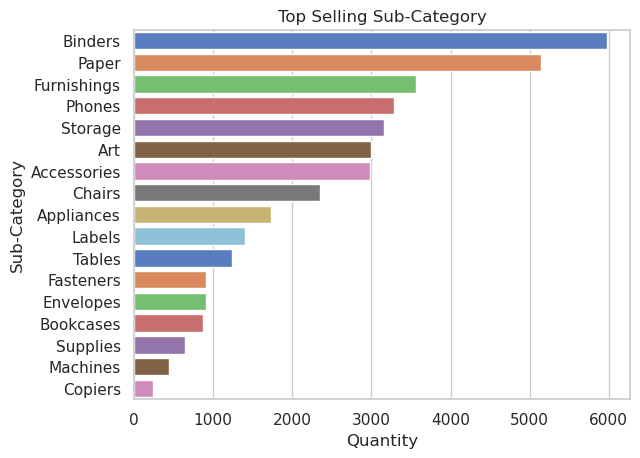

In [37]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

From this analysis, we can conclude:

- **Super Store** should prioritize **maintaining a sufficient inventory** for high-demand sub-categories such as **Binders, Paper, Furnishings, and Phones** to meet customer needs effectively.
- Although **Copiers** yield the highest profit, their **sales volume is the lowest** at 234 units. Given that copiers are higher-priced office equipment with longer usage lifespans, it is reasonable that their sales frequency is lower compared to other items.

### 4.4. Which Customer Segment is Most Profitable?

In [38]:
segment_analysis = pd.DataFrame(superstore.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


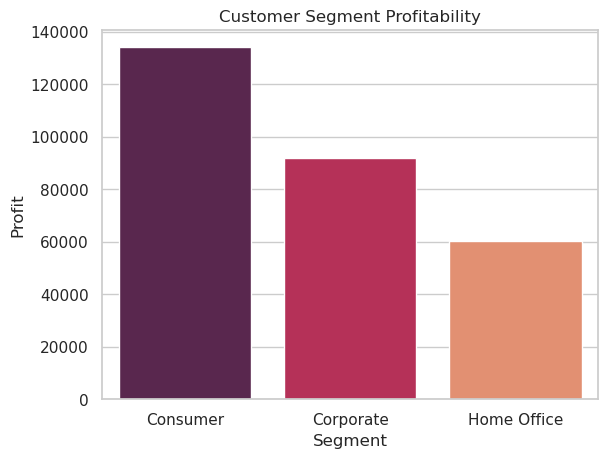

In [39]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

From the findings, we can infer:

- The **Consumer** segment emerges as the **most profitable**, **succeeded** by the **Corporate** and **Home Office** segments. Consequently, marketing strategies should be tailored or intensified to retain and attract customers from the Consumer and Corporate segments.

### 4.5. Which is the Preferred Ship Mode?

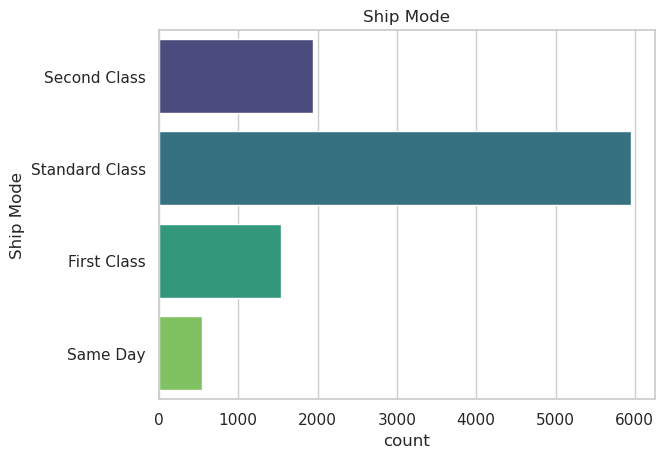

In [43]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(superstore['Ship Mode'], palette='viridis')
plt.title("Ship Mode")
plt.show()

From the analysis, it's evident that **Standard Class** is the overwhelmingly **preferred shipping method**, likely due to its cost-effectiveness. The alternative shipping modes are less favored among customers, possibly due to higher costs.

### 4.6. Which Region is the Most Profitable?

In [45]:
region_analysis = pd.DataFrame(superstore.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


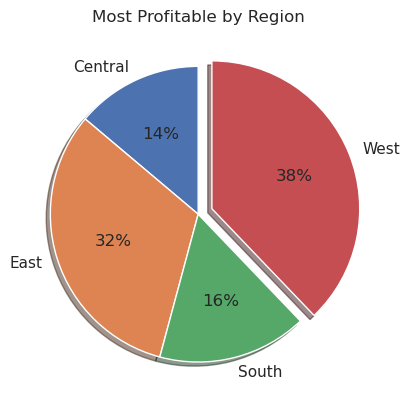

In [46]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()

By analysing this part of the graph, we can see that the **West** and **East** regions are the **most profitable**.

### 4.7. Which City has the Highest Number of Sales?

In [48]:
city_sales = pd.DataFrame(superstore.groupby('City')[['Sales', 'Quantity']].sum().sort_values(by='Sales', ascending=False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [49]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


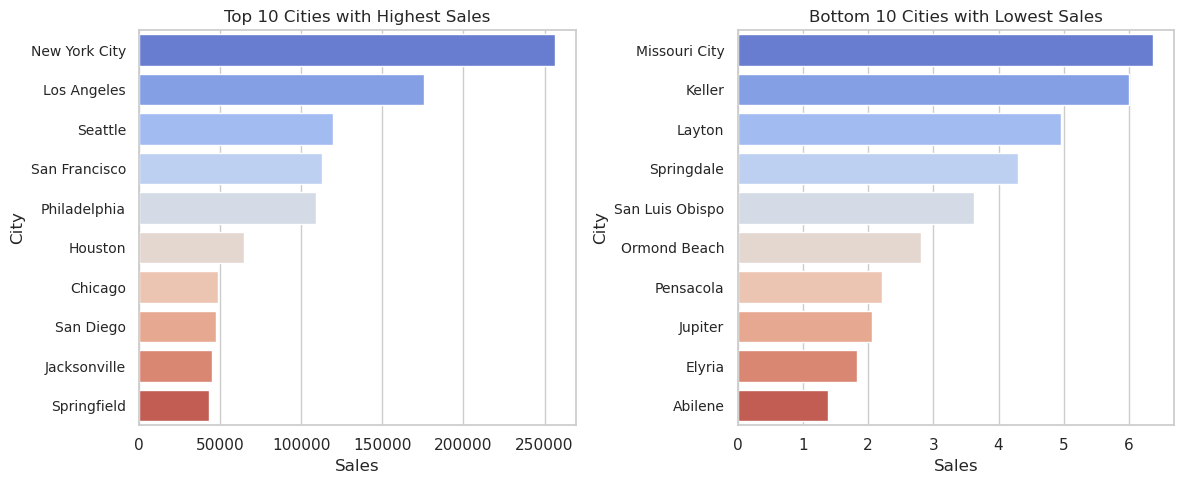

In [51]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

# Plot for Top 10 Cities with Highest Sales
top10c = sns.barplot(data=top10, y=top10.index, x=top10.Sales, palette="coolwarm", ax=axis[0])
top10c.set(title="Top 10 Cities with Highest Sales")  # Correct attribute name here
top10c.set_yticklabels(top10c.get_yticklabels(), size=10)

# Plot Bar Plot for Bottom 10 Cities with Lowest Sales
bottom10c = sns.barplot(data=bottom10, y=bottom10.index, x=bottom10.Sales, palette="coolwarm", ax=axis[1])
bottom10c.set(title="Bottom 10 Cities with Lowest Sales")  # Correct attribute name here
bottom10c.set_yticklabels(bottom10c.get_yticklabels(), size=10)

# Set spacing between subplots
figure.tight_layout()

plt.show()


The significant difference between the cities with the highest sales and those with the lowest highlights a key insight. The marketing strategy should be tailored to focus on the top 10 cities to maximize impact and sales potential.

## Strategic Recommendations:

- Prioritize and enhance the focus on the Technology category, specifically on Phones and Chairs, leveraging their high sales and profitability. Implement bundling strategies with less profitable items like Bookcases and Tables to improve overall margins.

- Reevaluate the offerings of Bookcases and Tables due to their significant loss contributions. Consider bundling these with higher selling or more profitable items such as Chairs, Copiers, Phones, and Office Supplies to improve sales.

- Develop tailored packages for the Home Office segment, incorporating essential office products like tables, chairs, phones, copiers, and organizational supplies, catering to their specific needs and convenience.

- Review the assortment and sourcing strategy for underperforming products like Supplies, Bookcases, and Tables. Explore options such as discontinuation, supplier renegotiation, or cost reduction initiatives.

- Strengthen marketing and promotional efforts targeting the Consumer and Corporate segments, particularly in the East and West regions, focusing on the top cities generating the highest sales. Introduce exclusive offers, bundles, and targeted communication to enhance engagement and sales.
These tailored recommendations aim to address your business questions while maximizing sales, profitability, and customer satisfaction based on the derived insights.

## More business questions

Based on the columns provided and building upon your original set of business questions, here are additional questions to explore in your dataset:

1. How do shipping modes impact sales and profit margins within each segment?
2. Which customer segment prefers each specific ship mode, and how does this preference affect overall sales?
3. What is the relationship between discount levels and profitability in each category and sub-category?
4. Which cities and states are underperforming in terms of sales and profit, despite having significant customer bases?
5. How does the average sales and profit per order vary across different postal codes and regions?
6. Are there specific sub-categories that perform exceptionally well or poorly in certain regions or cities?
7. How does the quantity sold correlate with the discount applied for each product category?
8. What is the impact of different discount levels on the sales volume and profitability of different sub-categories?
9. Which categories and sub-categories have the highest return on investment, considering the discount and quantity sold?
10. How does the profit margin differ between countries and states within the same region?
11. What are the trends and patterns in sales and profit across different seasons or months, and how do they relate to the ship mode and customer segments?
12. Is there a correlation between the type of products purchased (category and sub-category) and the customer segment or region?
13. How do sales and profits from online orders compare to direct orders across different regions and customer segments?
14. What is the effect of different shipping modes on the discount rates applied to orders in various categories?
15. Identify the top-performing and lowest-performing products within each category and sub-category in terms of quantity sold versus profit made.

These questions can help further dissect the data, providing a comprehensive understanding of the business's performance across different dimensions and guiding strategic decisions.

**Work in progress...**